In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [99]:
import numpy as np
import pandas as pd
import os

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

**inspect table name and column names**

In [6]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [7]:
columns_measure = inspector.get_columns('measurement')
for c in columns_measure:
    print(c['name'], c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [8]:
columns_station = inspector.get_columns('station')
for c in columns_station:
    print(c['name'], c['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


**reflect database into a new model**

In [9]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [10]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [11]:
# Save references to each table
Measurement = Base.classes.measurement

In [12]:
Station = Base.classes.station

In [13]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
# Use Pandas Plotting with Matplotlib to plot the data

### Precipitation Analysis

**Retrieve last 12 months of precipitation data and plot the results**

In [15]:
earliest_date = session.query(Measurement.date).order_by(Measurement.date).first()
earliest_date

('2010-01-01')

In [16]:
latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
latest_date

('2017-08-23')

In [26]:
from datetime import date, timedelta
is_date = datetime.strptime(*latest_date, "%Y-%m-%d")
is_date

datetime.datetime(2017, 8, 23, 0, 0)

In [27]:
one_year = is_date - timedelta(days=365)
one_year

datetime.datetime(2016, 8, 23, 0, 0)

In [75]:
# sorted by date ascending
one_year_ago = session.query(Measurement.date, Measurement.prcp) \
                      .filter(Measurement.date >= datetime.strftime(one_year, "%Y-%m-%d")) \
                      .filter(Measurement.prcp.isnot(None)) \
                      .order_by(Measurement.date).all()
one_year_df  = pd.DataFrame(one_year_ago, columns = ['date', 'prcp'])
one_year_df['date'] = pd.to_datetime(one_year_df['date'])
one_year_df.set_index('date', inplace=True)
one_year_df

,prcp
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,0.02
2016-08-23,1.79
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.00


**sort by date**

In [97]:
one_year_df = one_year_df.sort_index()
one_year_df

,prcp
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,0.02
2016-08-23,1.79
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.00


In [76]:
one_year_df.isnull().values.any()

False

In [77]:
one_year_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2021 entries, 2016-08-23 to 2017-08-23
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   prcp    2021 non-null   float64
dtypes: float64(1)
memory usage: 31.6 KB


In [78]:
min_date = one_year_df.index.min()
min_date

Timestamp('2016-08-23 00:00:00')

In [79]:
max_date = one_year_df.index.max()
max_date

Timestamp('2017-08-23 00:00:00')

In [80]:
import matplotlib.dates as mdt
from matplotlib.dates import DateFormatter

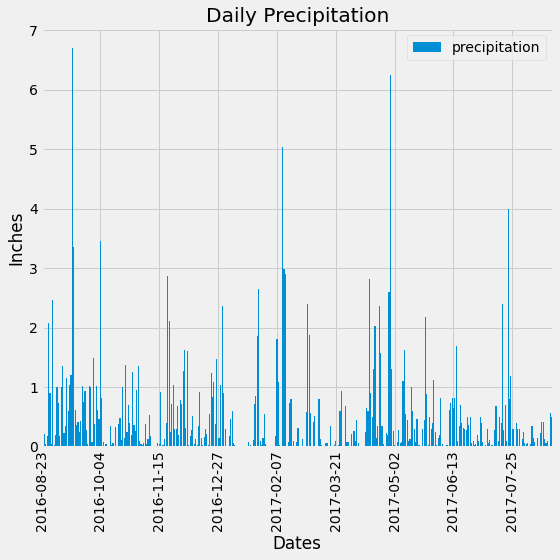

In [102]:
legend = ['precipitation']
fig, ax = plt.subplots(figsize=(8,8))

ax.bar(one_year_df.index, one_year_df['prcp'])

plt.xlim(min_date, max_date)
ax.set(xlabel = 'Dates', ylabel = 'Inches', title='Daily Precipitation')
ax.legend(legend, loc='best')
plt.xticks(rotation=90)

date_format = DateFormatter("%Y-%m-%d")

ax.xaxis_date()
ax.xaxis.set_major_formatter(date_format)
ax.xaxis.set_major_locator(mdt.WeekdayLocator(interval=6))

plt.style.use('fivethirtyeight')
plt.tight_layout()

file = os.path.join("Images","precipitation.png")
plt.savefig(file)

plt.show()

**Summary Statistics**

In [88]:
# Use Pandas to calcualte the summary statistics for the precipitation data
one_year_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [ ]:
# Design a query to show how many stations are available in this dataset?
# sorted by date ascending


In [ ]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.


In [ ]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?


In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
